<a href="https://colab.research.google.com/github/nasyawa/PCVK_GANJIL_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM MODUL 5 - Operasi Aritmatika dan Logika
Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

In [1]:
#Akses folder images pd GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
#import library
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

1. Gamma Correction pada Citra

Gamma Correction pada citra
--------------------------------
Masukan nilai Gamma: 3


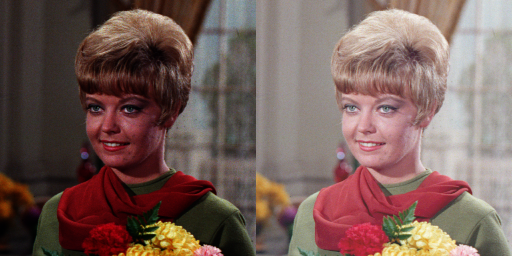

In [4]:
print('Gamma Correction pada citra')
print('--------------------------------')
try:
  gamma = int(input ('Masukan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)
#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c]=np.clip(255*(original[y,x,c]/255)**(1/gamma),0, 255)
                                                    #rumus gamma

final_frame=cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

semakin kecil nilai gamma, semakin gelap
semakin besar nilai gamma, semakin terang

2. Simulasi Image Depth

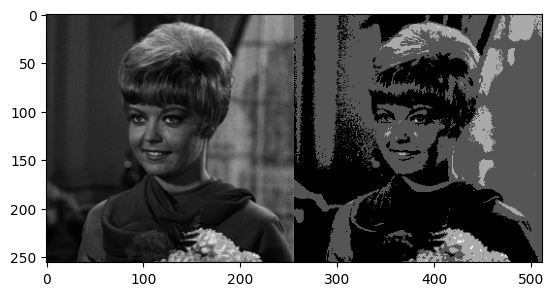

In [7]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level)*level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')



3. Modul Average Denoising

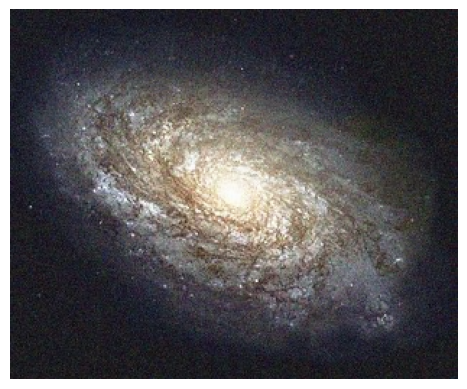

In [20]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

img_asli = cv.imread('galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlahGambar= 5
for i in range (jumlahGambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image= np.uint16(denoised_image/jumlahGambar)

plt.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))
plt.axis('off')  # Untuk menyembunyikan sumbu x dan y
plt.show()

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 5
29.13904142853049


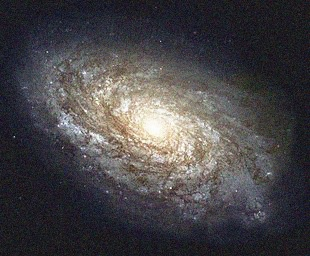

In [22]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth (pisahkan dengan spasi): 5 10 20 40 80 100
PSNR for Bit Depth 5: 29.13904142853049


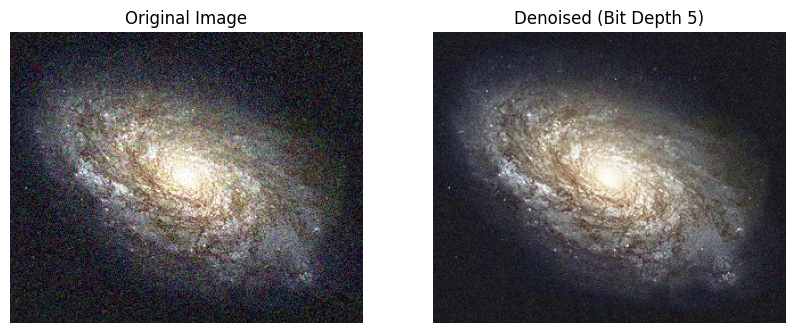

PSNR for Bit Depth 10: 29.01716884207273


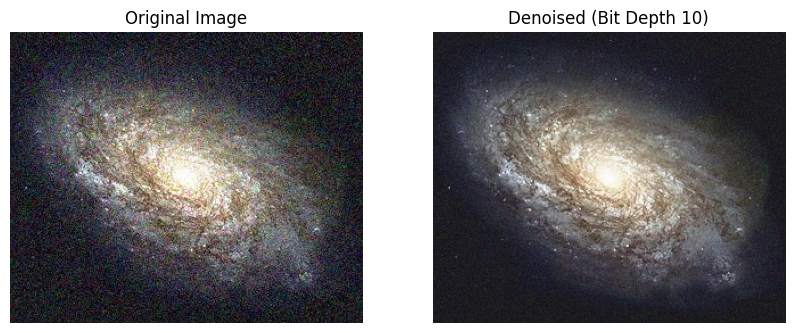

PSNR for Bit Depth 20: 28.95038722409053


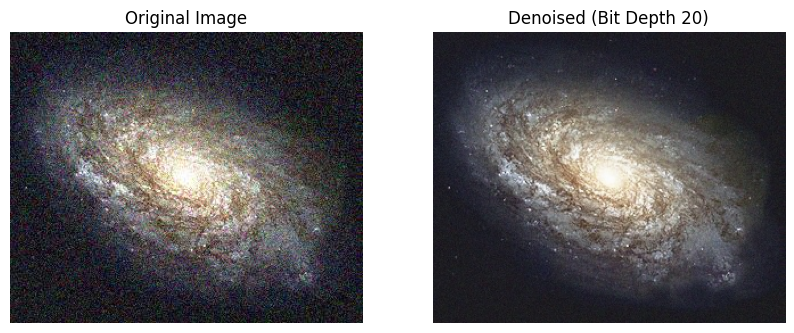

PSNR for Bit Depth 40: 28.932884904615285


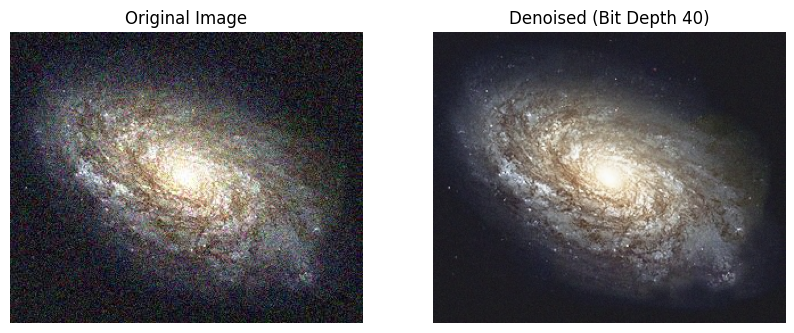

PSNR for Bit Depth 80: 28.929792450918267


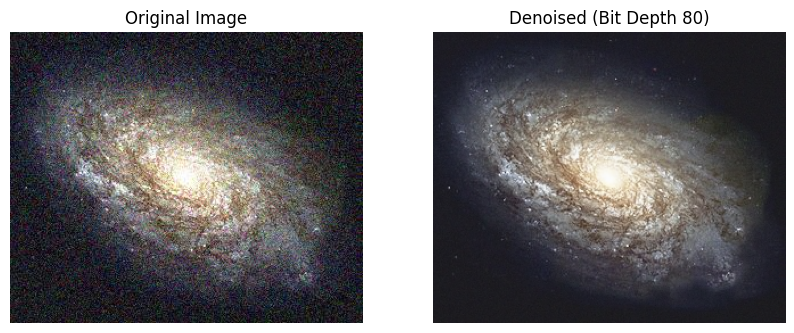

PSNR for Bit Depth 100: 28.926834757911806


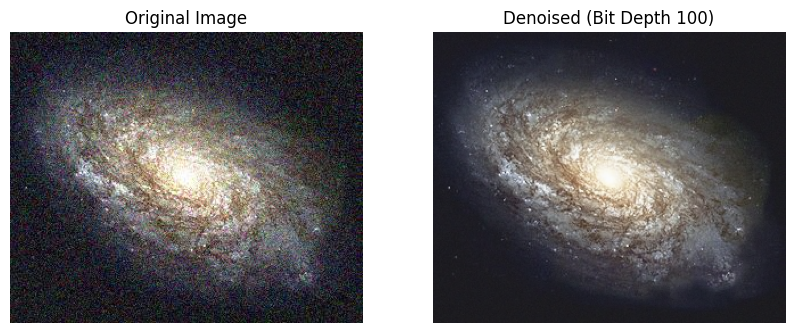

In [24]:
print(' Simulasi Image Depth ')
print('----------------------------------')

try:
    bit_depths = input('Masukkan nilai Bit Depth (pisahkan dengan spasi): ').split()
    bit_depths = [int(bit_depth) for bit_depth in bit_depths]
except ValueError:
    print('Error, invalid input')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

original_img = cv_img[0]  # Menggunakan gambar pertama sebagai gambar asli

for bit_depth in bit_depths:
    if bit_depth <= len(cv_img):
        avg_denoised_img = np.mean(cv_img[:bit_depth], axis=0).astype(np.uint8)

        def PSNR(img1, img2):
            mse = np.mean((img1 - img2) ** 2)
            if mse == 0:
                return 100
            max_pixel = 255.0
            psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
            return psnr

        print(f'PSNR for Bit Depth {bit_depth}: {PSNR(original_img, avg_denoised_img)}')

        # Menampilkan gambar asli dan hasil denoising
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv.cvtColor(avg_denoised_img, cv.COLOR_BGR2RGB))
        plt.title(f'Denoised (Bit Depth {bit_depth})')
        plt.axis('off')

        plt.show()
    else:
        print(f'Bit Depth {bit_depth} melebihi jumlah gambar yang tersedia.')


4. Image Masking

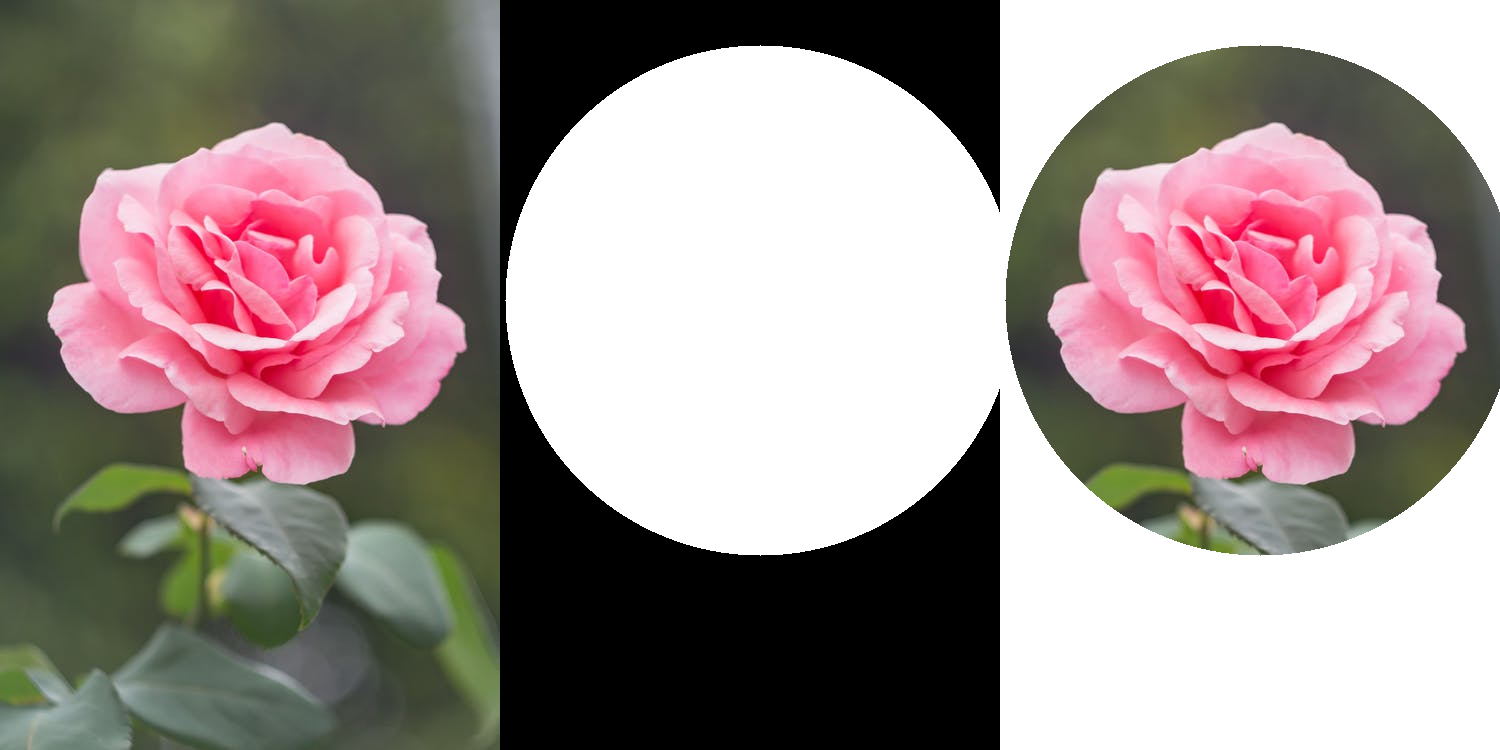

In [28]:
img = cv.imread('/content/drive/MyDrive/PCVK/rose_pink.png')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300),255, (255,255,255), -1)
#menggambar lingkaran pada mask

result = img & mask
result[mask==0]=255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


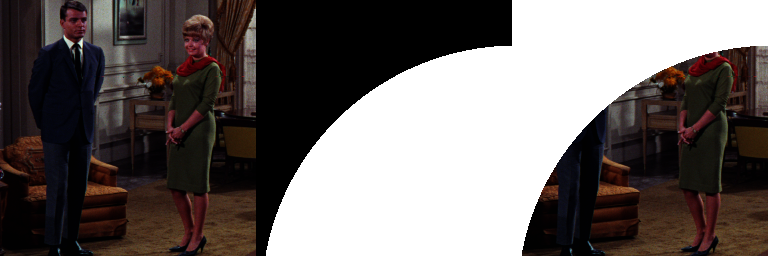

In [29]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask1 = np.zeros(img.shape, dtype=np.uint8)
mask1 = cv.circle(mask, (260, 300),255, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (260, 300),255, (255,255,255), -1)

#gabungin masknya
combined_mask = cv.bitwise_or(mask1, mask2)

# Menggunakan mask untuk menggabungkan gambar asli
result = cv.bitwise_and(img, combined_mask)

# Menampilkan gambar asli, mask1, mask2, dan hasil
final_frame = cv.hconcat((img, mask1, mask2, result))
cv2_imshow(final_frame)
